In [6]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import json
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report

In [22]:
data = pd.read_csv("C:\\Users\\DHRUBAJIT\\Desktop\\Kaggle Datasets\\Amazon cuisine reviews\\Reviews.csv")
data.head(2)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...


In [23]:
from sklearn.model_selection import train_test_split
data1, data2 = train_test_split(data, random_state=123, test_size=0.1)

In [24]:
data2.shape

(56846, 10)

       Count  Percentage
Score                   
1       5261    0.092548
2       2977    0.052370
3       4260    0.074939
4       8081    0.142156
5      36267    0.637987


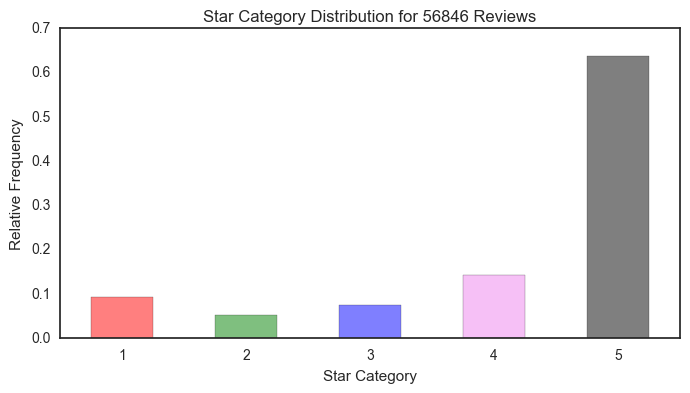

In [25]:
new = data2.copy()
new['count']=1
scores = new.groupby('Score')['count'].sum()
scores = pd.DataFrame(scores)
scores.columns=['Count']
scores['Percentage'] = scores.apply(lambda x: x/x.sum())
print(scores)

colors = np.array(['red','green','blue','violet','black'])
import seaborn as sns
sns.set()
sns.set(style="white")
plt.figure(figsize=(8, 4))
scores['Percentage'].plot(kind='bar', rot=0, color=colors, alpha=0.5)
plt.xlabel('Star Category');
plt.ylabel('Relative Frequency');
plt.title('Star Category Distribution for {0} Reviews'.format(len(new)));
plt.savefig("star_category.png")

In [26]:
new['length_text'] = new['Text'].apply(len)

In [7]:
import string
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
def analyser(mess):
    nopunc = [char for char in mess if char not in string.punctuation]
    nopunc = ''.join(nopunc)
    new = [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]
    #lemma = WordNetLemmatizer()
    #new_word = lemma.lemmatize(new)
    return new

In [8]:
new['clean_text'] = new['Text'].apply(analyser)

In [9]:
new['length_cleantext'] = new['clean_text'].apply(len)

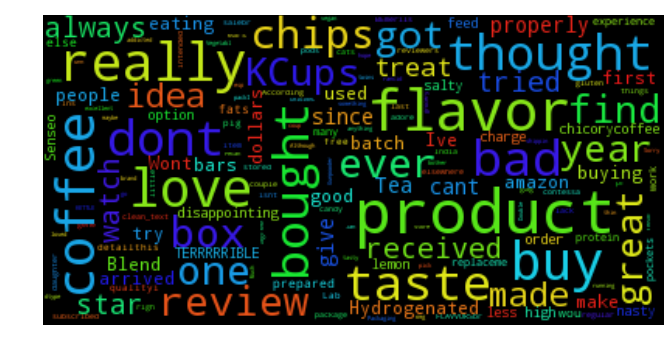

In [41]:
from wordcloud import WordCloud

def plot_word_cloud(data):
    # take relative word frequencies into account, lower max_font_size
    wordcloud = WordCloud(max_font_size=40, relative_scaling=.5).generate(str(data))
    plt.figure()
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show()
    
plot_word_cloud(new["clean_text"].loc[new.Score == 1, ])

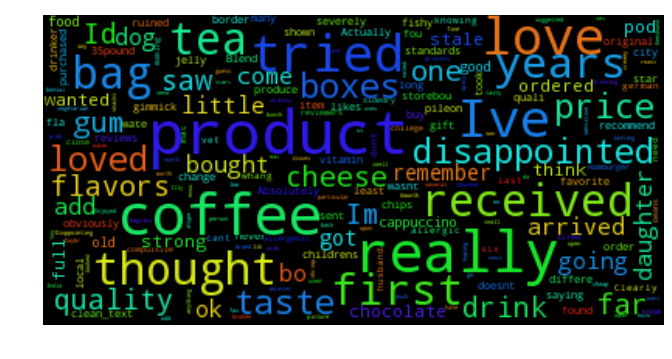

In [42]:
plot_word_cloud(new["clean_text"].loc[new.Score == 2, ])

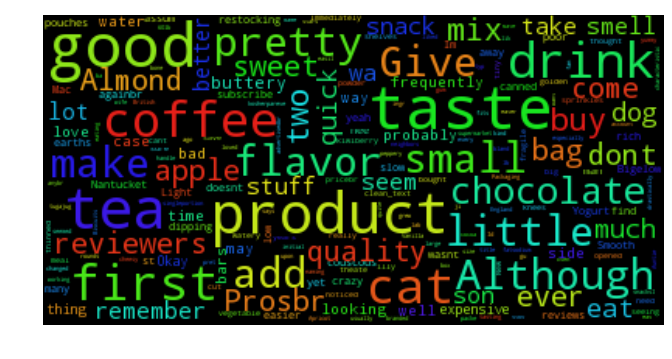

In [43]:
plot_word_cloud(new["clean_text"].loc[new.Score == 3, ])

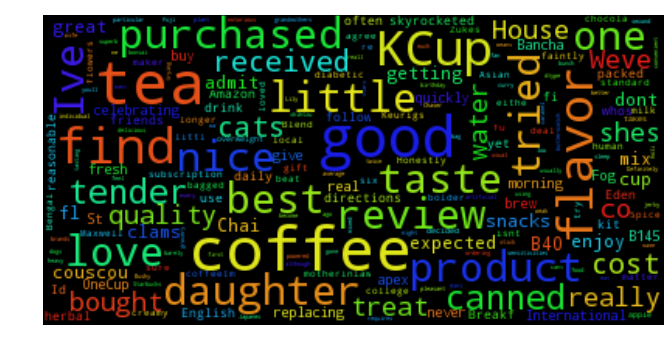

In [44]:
plot_word_cloud(new["clean_text"].loc[new.Score == 4, ])

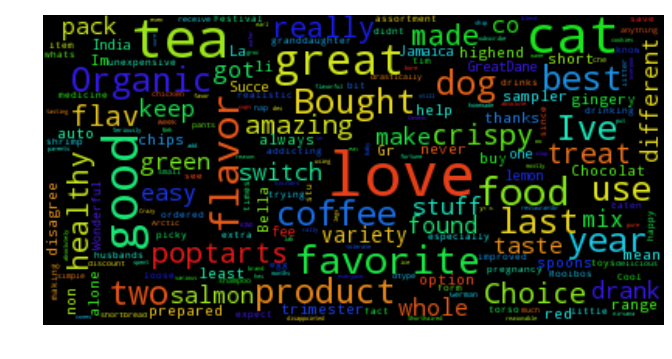

In [45]:
plot_word_cloud(new["clean_text"].loc[new.Score == 5, ])

In [52]:
length_means = new[['length_text','length_cleantext','Score']].groupby('Score').mean()
length_means

,length_text,length_cleantext
Score,,
1,476.009504,44.748337
2,497.061471,46.761169
3,523.461502,49.439202
4,490.763148,46.624675
5,398.707861,38.105357


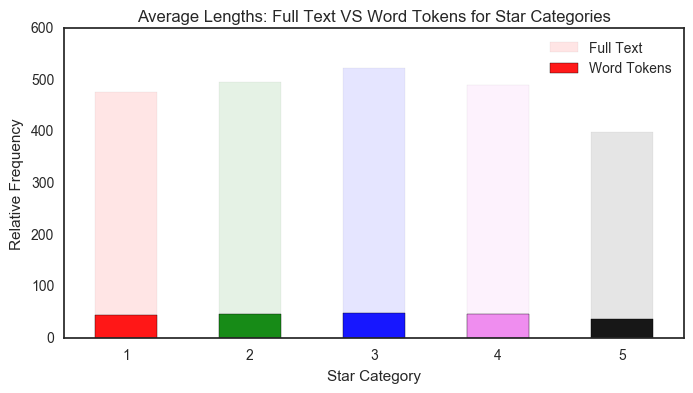

In [64]:
plt.figure(figsize=[8,4])
length_means['length_text'].plot(kind='bar', color=colors, alpha=0.1, rot=0, label='Full Text')
length_means['length_cleantext'].plot(kind='bar', color=colors, alpha=0.9, rot=0, label='Word Tokens')
plt.xlabel('Star Category');
plt.ylabel('Relative Frequency');
plt.title('Average Lengths: Full Text VS Word Tokens for Star Categories');
plt.legend()

In [2]:
cleaned_data = pd.read_csv("C:\\Users\\DHRUBAJIT\\Desktop\\Kaggle Datasets\\Amazon cuisine reviews\\clean_data1.csv", encoding='latin-1')
cleaned_data.head(2)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,count,length_text,clean_text,length_cleantext
0,277536,B000VK8AVK,AVP3I6MPAICQG,"Janae Stevens ""janaedawn""",0,0,5,1253318400,Healthy yum.,I love these chips! They always make a great h...,1,127,"['love', 'chips', 'always', 'make', 'great', '...",13
1,253902,B003VKR0EU,A22PDXVQMNCDLB,UmitoYama,1,1,2,1299110400,Crappy packaging. Formula is decent I suppose.,"To add to the pile-on, really really hate the ...",1,1343,"['add', 'pileon', 'really', 'really', 'hate', ...",126


In [ ]:
import re, string
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
corpus = []
for i in range(0,56846):
    review = re.sub('[^a-zA-Z]', ' ', cleaned_data['Text'].values[i])
    review = review.lower()
    review = review.split()
    lemma = WordNetLemmatizer()
    review = [lemma.lemmatize(word) for word in review if not word in set(stopwords.words('english'))]
    review = ' '.join(review)
    corpus.append(review)

In [ ]:
final_data = pd.DataFrame()
final_data['Text'] = corpus
final_data['Score'] = cleaned_data['Score'].values

final_csv = final_data.to_csv('final_data.csv', index=False)

In [2]:
final_data = pd.read_csv("C:\\Users\\DHRUBAJIT\\Desktop\\Kaggle Datasets\\Amazon cuisine reviews\\final_data.csv", encoding='latin-1')
final_data.head(2)

,Text,Score
0,love chip always make great healthy snack stuc...,5
1,add pile really really hate new packaging saw ...,2


In [3]:
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, roc_auc_score, confusion_matrix, classification_report

X = final_data['Text']
y = final_data['Score']

## Trial 1 - Count Frequency

In [14]:
bag_of_words_vectorizer = CountVectorizer(analyzer = "word",
                                          tokenizer = None,    
                                          preprocessor = None,
                                          ngram_range = (1, 1),
                                          binary = False,
                                          strip_accents='unicode')

random_forest_vectorizer = CountVectorizer(analyzer = "word",
                                           tokenizer = None,
                                           preprocessor = None,
                                           ngram_range = (1,1),
                                           strip_accents = 'unicode',
                                           max_features = 1000)

random_forest_vectorizer_bi = CountVectorizer(analyzer = "word",
                                           tokenizer = None,
                                           preprocessor = None,
                                           ngram_range = (2,2),
                                           strip_accents = 'unicode',
                                           max_features = 1000)

random_forest_vectorizer_tri = CountVectorizer(analyzer = "word",
                                           tokenizer = None,
                                           preprocessor = None,
                                           ngram_range = (3,3),
                                           strip_accents = 'unicode',
                                           max_features = 1000)

random_forest_vectorizer_unibi = CountVectorizer(analyzer = "word",
                                           tokenizer = None,
                                           preprocessor = None,
                                           ngram_range = (1,2),
                                           strip_accents = 'unicode',
                                           max_features = 1000)

train_X,test_X, train_y, test_y = train_test_split(X,y, test_size=0.3, random_state=0)

## 1. Bag of Words Models

### 1. MultinomialNB

In [52]:
bow_mnb = bag_of_words_vectorizer.fit_transform(train_X)
bow_mnb_test = bag_of_words_vectorizer.transform(test_X)

bow_mnb_classifier = MultinomialNB()
bow_mnb_classifier.fit(bow_mnb, train_y)
bow_mnb_prediction = bow_mnb_classifier.predict(bow_mnb_test)

print(confusion_matrix(test_y,bow_mnb_prediction))
print("")
print(classification_report(test_y,bow_mnb_prediction))
print("")
print('Precision variance: %f' %(np.var(precision_score(test_y, bow_mnb_prediction, average=None))))
print('Recall variance: %f' %(np.var(recall_score(test_y, bow_mnb_prediction, average=None))))

[[  816    45    58   115   535]
 [  186    52    83   179   402]
 [  134    15   143   344   677]
 [   93    10    62   615  1642]
 [  184    20    67   539 10038]]

             precision    recall  f1-score   support

          1       0.58      0.52      0.55      1569
          2       0.37      0.06      0.10       902
          3       0.35      0.11      0.17      1313
          4       0.34      0.25      0.29      2422
          5       0.76      0.93      0.83     10848

avg / total       0.63      0.68      0.64     17054


Precision variance: 0.026940
Recall variance: 0.102014


### 2. Bernoulli Naive Bayes

In [46]:
bow_bnb = bag_of_words_vectorizer.fit_transform(train_X)
bow_bnb_test = bag_of_words_vectorizer.transform(test_X)

from sklearn.naive_bayes import BernoulliNB
bow_bnb_classifier = BernoulliNB()
bow_bnb_classifier.fit(bow_bnb, train_y)
bow_bnb_prediction = bow_bnb_classifier.predict(bow_bnb_test)

print(confusion_matrix(test_y,bow_bnb_prediction))
print(classification_report(test_y,bow_bnb_prediction))
print("")
print('Precision variance: %f' %(np.var(precision_score(test_y, bow_bnb_prediction, average=None))))
print('Recall variance: %f' %(np.var(recall_score(test_y, bow_bnb_prediction, average=None))))

[[ 531   31   64   56  887]
 [ 101   32   71  131  567]
 [  74   16  146  245  832]
 [  47   17   96  539 1723]
 [ 138   48  162  872 9628]]
             precision    recall  f1-score   support

          1       0.60      0.34      0.43      1569
          2       0.22      0.04      0.06       902
          3       0.27      0.11      0.16      1313
          4       0.29      0.22      0.25      2422
          5       0.71      0.89      0.79     10848

avg / total       0.58      0.64      0.59     17054


Precision variance: 0.038072
Recall variance: 0.091297


### 3. SGDClassifier

In [44]:
from sklearn.linear_model import SGDClassifier
bow_sgd = bag_of_words_vectorizer.fit_transform(train_X)
bow_sgd_test = bag_of_words_vectorizer.transform(test_X)

bow_sgd_classifier = SGDClassifier()
bow_sgd_classifier.fit(bow_sgd, train_y)
bow_sgd_prediction = bow_sgd_classifier.predict(bow_sgd_test)

print(confusion_matrix(test_y,bow_sgd_prediction))
print(classification_report(test_y,bow_sgd_prediction))
print("")
print('Precision variance: %f' %(np.var(precision_score(test_y, bow_sgd_prediction, average=None))))
print('Recall variance: %f' %(np.var(recall_score(test_y, bow_sgd_prediction, average=None))))

[[  813   108   102    42   504]
 [  223   134   119    54   372]
 [  144   104   270   156   639]
 [   85    65   172   351  1749]
 [  165    81   131   264 10207]]
             precision    recall  f1-score   support

          1       0.57      0.52      0.54      1569
          2       0.27      0.15      0.19       902
          3       0.34      0.21      0.26      1313
          4       0.40      0.14      0.21      2422
          5       0.76      0.94      0.84     10848

avg / total       0.63      0.69      0.64     17054


Precision variance: 0.030533
Recall variance: 0.094453


### 4. RandomForestClassifier

In [48]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100)
bow_rf = bag_of_words_vectorizer.fit_transform(train_X)
bow_rf_test = bag_of_words_vectorizer.transform(test_X)
rf.fit(bow_rf, train_y)
bow_rf_pred = rf.predict(bow_rf_test)

print(confusion_matrix(test_y,bow_rf_pred))
print(classification_report(test_y,bow_rf_pred))
print("")
print('Precision variance: %f' %(np.var(precision_score(test_y, bow_rf_pred, average=None))))
print('Recall variance: %f' %(np.var(recall_score(test_y, bow_rf_pred, average=None))))

[[  429     0     2     3  1135]
 [   40    97     2    12   751]
 [   18     0   166    17  1112]
 [    9     0     1   273  2139]
 [    7     0     0     6 10835]]
             precision    recall  f1-score   support

          1       0.85      0.27      0.41      1569
          2       1.00      0.11      0.19       902
          3       0.97      0.13      0.22      1313
          4       0.88      0.11      0.20      2422
          5       0.68      1.00      0.81     10848

avg / total       0.76      0.69      0.61     17054


Precision variance: 0.012790
Recall variance: 0.117689


### 5. SVC

In [49]:
from sklearn.svm import SVC
svc = SVC()
bow_svc = bag_of_words_vectorizer.fit_transform(train_X)
bow_svc_test = bag_of_words_vectorizer.transform(test_X)
svc.fit(bow_svc, train_y)
bow_svc_pred = svc.predict(bow_svc_test)

print(confusion_matrix(test_y,bow_svc_pred))
print(classification_report(test_y,bow_svc_pred))
print("")
print('Precision variance: %f' %(np.var(precision_score(test_y, bow_svc_pred, average=None))))
print('Recall variance: %f' %(np.var(recall_score(test_y, bow_svc_pred, average=None))))

[[    0     0     0     0  1569]
 [    0     0     0     0   902]
 [    0     0     0     0  1313]
 [    0     0     0     0  2422]
 [    0     0     0     0 10848]]
             precision    recall  f1-score   support

          1       0.00      0.00      0.00      1569
          2       0.00      0.00      0.00       902
          3       0.00      0.00      0.00      1313
          4       0.00      0.00      0.00      2422
          5       0.64      1.00      0.78     10848

avg / total       0.40      0.64      0.49     17054


Precision variance: 0.064739
Recall variance: 0.160000


C:\Users\DHRUBAJIT\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.

C:\Users\DHRUBAJIT\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples.



## Trial 2 -- Term Frequency Analysis

### 1. RandomForest - 100 learners 

In [54]:
from sklearn.ensemble import RandomForestClassifier
rf100 = RandomForestClassifier(n_estimators=100)
random_forest_feature_matrix_train1 = random_forest_vectorizer.fit_transform(train_X)
random_forest_feature_matrix_test1 = random_forest_vectorizer.transform(test_X)

tfidf_transformer = TfidfTransformer()
data_tfidf_forest100 = tfidf_transformer.fit_transform(random_forest_feature_matrix_train1)
data_tfidf_test_forest100 = tfidf_transformer.transform(random_forest_feature_matrix_test1)

rf100.fit(data_tfidf_forest100, train_y)
forest100_pred1 = rf100.predict(data_tfidf_test_forest100)

print(confusion_matrix(test_y,forest100_pred1))
print(classification_report(test_y,forest100_pred1))
print("")
print('Precision variance: %f' %(np.var(precision_score(test_y, forest100_pred1, average=None))))
print('Recall variance: %f' %(np.var(recall_score(test_y, forest100_pred1, average=None))))

[[  526     3    10    19  1011]
 [   76    98    15    31   682]
 [   40     0   199    75   999]
 [   27     0    17   393  1985]
 [   39     1    10    50 10748]]
             precision    recall  f1-score   support

          1       0.74      0.34      0.46      1569
          2       0.96      0.11      0.20       902
          3       0.79      0.15      0.25      1313
          4       0.69      0.16      0.26      2422
          5       0.70      0.99      0.82     10848

avg / total       0.72      0.70      0.63     17054


Precision variance: 0.009773
Recall variance: 0.108739


### 2. RandomForest - 500 learners

In [55]:
rf500 = RandomForestClassifier(n_estimators=500)
random_forest_feature_matrix_train1 = random_forest_vectorizer.fit_transform(train_X)
random_forest_feature_matrix_test1 = random_forest_vectorizer.transform(test_X)

tfidf_transformer = TfidfTransformer()
data_tfidf_forest500 = tfidf_transformer.fit_transform(random_forest_feature_matrix_train1)
data_tfidf_test_forest500 = tfidf_transformer.transform(random_forest_feature_matrix_test1)

rf500.fit(data_tfidf_forest500, train_y)
forest500_pred = rf500.predict(data_tfidf_test_forest500)

print(confusion_matrix(test_y,forest500_pred))
print(classification_report(test_y,forest500_pred))
print("")
print('Precision variance: %f' %(np.var(precision_score(test_y, forest500_pred, average=None))))
print('Recall variance: %f' %(np.var(recall_score(test_y, forest500_pred, average=None))))

[[  517     2     7    21  1022]
 [   79    96    15    26   686]
 [   33     0   194    62  1024]
 [   26     0    14   369  2013]
 [   33     0     7    29 10779]]
             precision    recall  f1-score   support

          1       0.75      0.33      0.46      1569
          2       0.98      0.11      0.19       902
          3       0.82      0.15      0.25      1313
          4       0.73      0.15      0.25      2422
          5       0.69      0.99      0.82     10848

avg / total       0.73      0.70      0.63     17054


Precision variance: 0.010234
Recall variance: 0.110781


### 3. RandomForest - 1000 learners

In [56]:
rf1000 = RandomForestClassifier(n_estimators=1000)
random_forest_feature_matrix_train1 = random_forest_vectorizer.fit_transform(train_X)
random_forest_feature_matrix_test1 = random_forest_vectorizer.transform(test_X)

tfidf_transformer = TfidfTransformer()
data_tfidf_forest1000 = tfidf_transformer.fit_transform(random_forest_feature_matrix_train1)
data_tfidf_test_forest1000 = tfidf_transformer.transform(random_forest_feature_matrix_test1)

rf1000.fit(data_tfidf_forest1000, train_y)
forest1000_pred1 = rf1000.predict(data_tfidf_test_forest1000)

print(confusion_matrix(test_y,forest1000_pred1))
print(classification_report(test_y,forest1000_pred1))
print("")
print('Precision variance: %f' %(np.var(precision_score(test_y, forest1000_pred1, average=None))))
print('Recall variance: %f' %(np.var(recall_score(test_y, forest1000_pred1, average=None))))

[[  513     2     6    23  1025]
 [   72    96    13    26   695]
 [   37     0   192    51  1033]
 [   22     0    16   370  2014]
 [   35     0     7    26 10780]]
             precision    recall  f1-score   support

          1       0.76      0.33      0.46      1569
          2       0.98      0.11      0.19       902
          3       0.82      0.15      0.25      1313
          4       0.75      0.15      0.25      2422
          5       0.69      0.99      0.82     10848

avg / total       0.73      0.70      0.63     17054


Precision variance: 0.009787
Recall variance: 0.110911


## 3. Trial 3 - 'ngram' analysis

### 1. Uni-gram (1,1)

In [9]:
rf1000_uni = RandomForestClassifier(n_estimators=1000)
rf1000_uni_train = random_forest_vectorizer.fit_transform(train_X)
rf1000_uni_test = random_forest_vectorizer.transform(test_X)

tfidf_transformer = TfidfTransformer()
rf1000_uni_tfidf = tfidf_transformer.fit_transform(rf1000_uni_train)
rf1000_uni_tfidf_test = tfidf_transformer.transform(rf1000_uni_test)

rf1000_uni.fit(rf1000_uni_tfidf, train_y)
rf1000_uni_tfidf_pred = rf1000_uni.predict(rf1000_uni_tfidf_test)

print(confusion_matrix(test_y,rf1000_uni_tfidf_pred))
print(classification_report(test_y,rf1000_uni_tfidf_pred))
print("")
print('Precision variance: %f' %(np.var(precision_score(test_y, rf1000_uni_tfidf_pred, average=None))))
print('Recall variance: %f' %(np.var(recall_score(test_y, rf1000_uni_tfidf_pred, average=None))))

[[  523     1     7    27  1011]
 [   73    96    13    24   696]
 [   35     0   192    56  1030]
 [   24     0    15   374  2009]
 [   32     0     8    29 10779]]
             precision    recall  f1-score   support

          1       0.76      0.33      0.46      1569
          2       0.99      0.11      0.19       902
          3       0.82      0.15      0.25      1313
          4       0.73      0.15      0.26      2422
          5       0.69      0.99      0.82     10848

avg / total       0.73      0.70      0.63     17054


Precision variance: 0.010677
Recall variance: 0.110720


### 2. Bi-gram (2,2)

In [12]:
rf1000_bi = RandomForestClassifier(n_estimators=1000)
rf1000_bi_train = random_forest_vectorizer_bi.fit_transform(train_X)
rf1000_bi_test = random_forest_vectorizer_bi.transform(test_X)

tfidf_transformer = TfidfTransformer()
rf1000_bi_tfidf = tfidf_transformer.fit_transform(rf1000_bi_train)
rf1000_bi_tfidf_test = tfidf_transformer.transform(rf1000_bi_test)

rf1000_bi.fit(rf1000_bi_tfidf, train_y)
rf1000_bi_tfidf_pred = rf1000_bi.predict(rf1000_bi_tfidf_test)

print(confusion_matrix(test_y,rf1000_bi_tfidf_pred))
print(classification_report(test_y,rf1000_bi_tfidf_pred))
print("")
print('Precision variance: %f' %(np.var(precision_score(test_y, rf1000_bi_tfidf_pred, average=None))))
print('Recall variance: %f' %(np.var(recall_score(test_y, rf1000_bi_tfidf_pred, average=None))))

[[  363    18    24    44  1120]
 [   86    85    20    34   677]
 [   69    18   158   102   966]
 [   47    13    39   384  1939]
 [  192    22    56   265 10313]]
             precision    recall  f1-score   support

          1       0.48      0.23      0.31      1569
          2       0.54      0.09      0.16       902
          3       0.53      0.12      0.20      1313
          4       0.46      0.16      0.24      2422
          5       0.69      0.95      0.80     10848

avg / total       0.62      0.66      0.59     17054


Precision variance: 0.006240
Recall variance: 0.104424


### 3. Tri-gram  (3,3)

In [13]:
rf1000_tri = RandomForestClassifier(n_estimators=1000)
rf1000_tri_train = random_forest_vectorizer_tri.fit_transform(train_X)
rf1000_tri_test = random_forest_vectorizer_tri.transform(test_X)

tfidf_transformer = TfidfTransformer()
rf1000_tri_tfidf = tfidf_transformer.fit_transform(rf1000_tri_train)
rf1000_tri_tfidf_test = tfidf_transformer.transform(rf1000_tri_test)

rf1000_tri.fit(rf1000_tri_tfidf, train_y)
rf1000_tri_tfidf_pred = rf1000_tri.predict(rf1000_tri_tfidf_test)

print(confusion_matrix(test_y,rf1000_tri_tfidf_pred))
print(classification_report(test_y,rf1000_tri_tfidf_pred))
print("")
print('Precision variance: %f' %(np.var(precision_score(test_y, rf1000_tri_tfidf_pred, average=None))))
print('Recall variance: %f' %(np.var(recall_score(test_y, rf1000_tri_tfidf_pred, average=None))))

[[   93     9    18    34  1415]
 [   22    30    16    23   811]
 [   23     5    79    66  1140]
 [   21    15    29   166  2191]
 [   63    20    59   149 10557]]
             precision    recall  f1-score   support

          1       0.42      0.06      0.10      1569
          2       0.38      0.03      0.06       902
          3       0.39      0.06      0.10      1313
          4       0.38      0.07      0.12      2422
          5       0.66      0.97      0.78     10848

avg / total       0.56      0.64      0.54     17054


Precision variance: 0.011231
Recall variance: 0.134936


### 4. Uni-bi-gram (1,2)

In [15]:
rf1000_unibi = RandomForestClassifier(n_estimators=1000)
rf1000_unibi_train = random_forest_vectorizer_unibi.fit_transform(train_X)
rf1000_unibi_test = random_forest_vectorizer_unibi.transform(test_X)

tfidf_transformer = TfidfTransformer()
rf1000_unibi_tfidf = tfidf_transformer.fit_transform(rf1000_unibi_train)
rf1000_unibi_tfidf_test = tfidf_transformer.transform(rf1000_unibi_test)

rf1000_unibi.fit(rf1000_unibi_tfidf, train_y)
rf1000_unibi_tfidf_pred = rf1000_unibi.predict(rf1000_unibi_tfidf_test)

print(confusion_matrix(test_y,rf1000_unibi_tfidf_pred))
print(classification_report(test_y,rf1000_unibi_tfidf_pred))
print("")
print('Precision variance: %f' %(np.var(precision_score(test_y, rf1000_unibi_tfidf_pred, average=None))))
print('Recall variance: %f' %(np.var(recall_score(test_y, rf1000_unibi_tfidf_pred, average=None))))

[[  527     1     6    21  1014]
 [   69    96    15    22   700]
 [   34     0   190    62  1027]
 [   22     0    16   369  2015]
 [   34     0     7    33 10774]]
             precision    recall  f1-score   support

          1       0.77      0.34      0.47      1569
          2       0.99      0.11      0.19       902
          3       0.81      0.14      0.25      1313
          4       0.73      0.15      0.25      2422
          5       0.69      0.99      0.82     10848

avg / total       0.73      0.70      0.63     17054


Precision variance: 0.010724
Recall variance: 0.110871
